## Начало 

Проверим точность простой модели, состоящей из 3-х свёрточных слоёв.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pickle
import methods

Зададим место, где лежат файлы.

In [2]:
DATA_FOLDER = "data"
CATEGORY_1 = "cat"
CATEGORY_2 = "dog"

## Взглянем на данные 

cat training data length:  7999
dog training data length:  7999
cat validation data length:  2001
dog validation data length:  2001
cat test data length:  2499
dog test data length:  2499


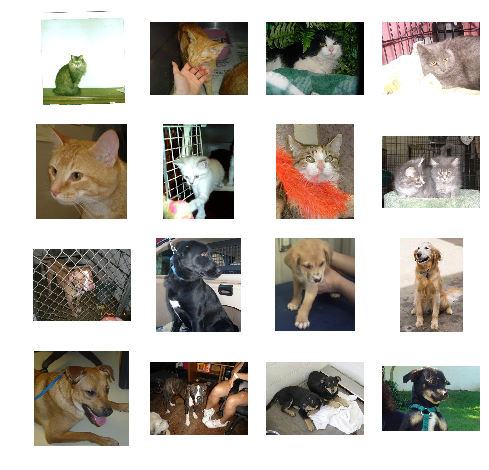

In [3]:
methods.visualize_data(DATA_FOLDER, CATEGORY_1, CATEGORY_2)

## Подготовим данные

In [4]:
image_size = 160 # All images will be resized to 150x150
batch_size = 32

train_datagen = ImageDataGenerator(rescale = 1/255)
validation_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
        DATA_FOLDER + '/train',
        target_size = (image_size, image_size),
        batch_size = batch_size,
        class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
        DATA_FOLDER + '/validation',
        target_size = (image_size, image_size),
        batch_size = batch_size,
        class_mode = 'binary'
)

test_generator = test_datagen.flow_from_directory(
        DATA_FOLDER + '/test',
        target_size = (image_size, image_size),
        batch_size = batch_size,
        shuffle=False,
        class_mode = "binary"
)

Found 15998 images belonging to 2 classes.
Found 4002 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


## Построим и обучим модель 

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(image_size, image_size, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 158, 158, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 79, 79, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 77, 77, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 36, 36, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10368)             0         
__________

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [8]:
epochs = 2
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

In [9]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch = steps_per_epoch,
      epochs = epochs,
      workers = 4,
      validation_data = validation_generator,
      validation_steps = validation_steps)

Instructions for updating:
Use tf.cast instead.
Epoch 1/2
 91/500 [====>.........................] - ETA: 2:24 - loss: 4.7355 - acc: 0.5227

D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 307363840 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 307888128 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffIma

303/500 [=================>............] - ETA: 1:10 - loss: 1.8924 - acc: 0.5830

D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 425459712 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 6833. Skipping tag 513
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\

422/500 [========================>.....] - ETA: 26s - loss: 1.5287 - acc: 0.6121

D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 18350080 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:780: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 6. 
  warnings.warn(str(msg))


105/126 [========================>.....] - ETA: 8s - loss: 0.6007 - acc: 0.6720

D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: Us

500/500 [==============================] - 215s 430ms/step - loss: 1.3814 - acc: 0.6261 - val_loss: 0.6013 - val_acc: 0.6704
Epoch 2/2
500/500 [==============================] - 45s 90ms/step - loss: 0.5098 - acc: 0.7527 - val_loss: 0.4853 - val_acc: 0.7726


##  Сохраним результаты

Сохраним модель.

In [10]:
model.save("models/basicConvolution/basicConvolution.h5")

In [11]:
saved_model_path = "models/basicConvolution/"
tf.contrib.saved_model.save_keras_model(model, saved_model_path)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.


Consider using a TensorFlow optimizer from `tf.train`.
Instructions for updating:
Use tf.train.CheckpointManager to manage checkpoints rather than manually editing the Checkpoint proto.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']
INFO:tensorflow:Signatures INCLUDED in export for Train: None
INFO:tensorflow:Signatures INCLUDED in export for Eval: None
INFO:tensorflow:No assets to save.
INFO:tensor

b'models/basicConvolution/1563485707'

Сохраним историю обучения.

In [12]:
with open("histories/basicConvolution/basicConvolutionHistory", 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

## Восстановим результаты 

Восстановим модель.

In [13]:
model_loaded = keras.models.load_model("models/basicConvolution/basicConvolution.h5")

Восстановим историю обучения.

In [14]:
with open("histories/basicConvolution/basicConvolutionHistory", 'rb') as file_pi:
    history_loaded = pickle.load(file_pi)

## Посмотрим результаты 

Посмотрим графики обучения.

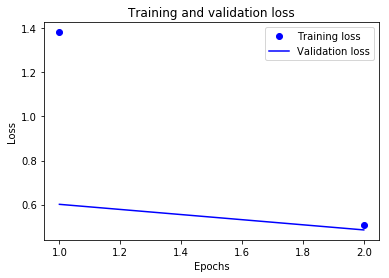

In [15]:
methods.loss(history_loaded)

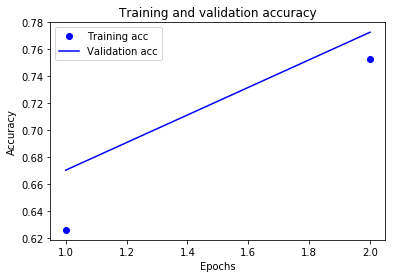

In [16]:
methods.acc(history_loaded)

Оценим параметры модели.

In [17]:
methods.AccRecPrec(model_loaded.predict_generator(test_generator), test_generator.classes)

D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 262146 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 262151 bytes but only got 0. Skipping tag 56
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:780: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 0. 
  warnings.warn(str(msg))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF 

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
accuracy:  0.7617047
recall:    0.8147259
precision: 0.73661363
f1:        0.7737032198786623
